# Problem description

You are to predict whether a company will go bankrupt in the following year, based on financial attributes of the company.

Perhaps you are contemplating lending money to a company, and need to know whether the company
is in near-term danger of not being able to repay.


## Goal

## Learning objectives

- Demonstrate mastery on solving a classification problem and presenting
the entire Recipe for Machine Learning process in a notebook.
- We will make suggestions for ways to approach the problem
    - But there will be little explicit direction for this task.
- It is meant to be analogous to a pre-interview task that a potential employer might assign
to verify your skill

# Import modules

In [8]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math

%matplotlib inline


# API for students

In [9]:
## Load the bankruptcy_helper module

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# Import bankruptcy_helper module
import bankruptcy_helper
%aimport bankruptcy_helper

helper = bankruptcy_helper.Helper()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Get the data

The first step in our Recipe is Get the Data.

- Each example is a row of data corresponding to a single company
- There are 64 attributes, described in the section below
- The column `Bankrupt` is 1 if the company subsequently went bankrupt; 0 if it did not go bankrupt
- The column `Id` is a Company Identifier

In [10]:
# Data directory
DATA_DIR = "./Data"

if not os.path.isdir(DATA_DIR):
    DATA_DIR = "../resource/asnlib/publicdata/bankruptcy/data"

data_file = "5th_yr.csv"
data = pd.read_csv( os.path.join(DATA_DIR, "train", data_file) )

target_attr = "Bankrupt"

n_samples, n_attrs = data.shape
print("Date shape: ", data.shape)

Date shape:  (4818, 66)


## Have a look at the data

We will not go through all steps in the Recipe, nor in depth.

But here's a peek

In [11]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.41769,0.0568,1.1605,-126.39,0.41355,0.025417,1.2395,1.16500,0.51773,...,0.049094,0.85835,0.12322,5.6167,7.4042,164.310,2.2214,1.334,0,4510
1,-0.023834,0.2101,0.50839,4.2374,22.034,0.058412,-0.027621,3.6579,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.802,6.4782,0,3537
2,0.030515,0.44606,0.19569,1.565,35.766,0.28196,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.25266,15.049,2.8179,104.730,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.68,438.2,0.13649,0.058164,10.853,1.02790,0.61173,...,0.085524,0.97282,0,6.0157,7.4626,48.756,7.4863,1.0602,0,1806
4,0.000992,0.49712,0.12316,1.3036,-71.398,0,0.001007,1.0116,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.582,114.580,3.1854,2.742,0,1529


Pretty *unhelpful* !

What are these mysteriously named features ?

## Description of attributes

This may still be somewhat unhelpful for those of you not used to reading Financial Statements.

But that's partially the point of the exercise
- You can *still* perform Machine Learning *even if* you are not an expert in the problem domain
    - That's what makes this a good interview exercise: you can demonstrate your thought process even if you don't know the exact meaning of the terms
- Of course: becoming an expert in the domain *will improve* your ability to create better models
    - Feature engineering is easier if you understand the features, their inter-relationships, and the relationship to the target

Let's get a feel for the data
- What is the type of each attribute ?


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4818 non-null   object 
 1   X2        4818 non-null   object 
 2   X3        4818 non-null   object 
 3   X4        4818 non-null   object 
 4   X5        4818 non-null   object 
 5   X6        4818 non-null   object 
 6   X7        4818 non-null   object 
 7   X8        4818 non-null   object 
 8   X9        4818 non-null   float64
 9   X10       4818 non-null   object 
 10  X11       4818 non-null   object 
 11  X12       4818 non-null   object 
 12  X13       4818 non-null   float64
 13  X14       4818 non-null   object 
 14  X15       4818 non-null   object 
 15  X16       4818 non-null   object 
 16  X17       4818 non-null   object 
 17  X18       4818 non-null   object 
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4818 non-null   obje

You may be puzzled:
- Most attributes are `object` and *not* numeric (`float64`)
- But looking at the data via `data.head()` certainly gives the impression that all attributes are numeric

Welcome to the world of messy data !  The dataset has represented numbers as strings.
- These little unexpected challenges are common in the real-word
- Data is rarely perfect and clean

So you might want to first convert all attributes to numeric

**Hint**
- Look up the Pandas method `to_numeric`
    - We suggest you use the option `errors='coerce'`
    

In [13]:
data_num = data.apply(pd.to_numeric, errors = 'coerce')
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4816 non-null   float64
 1   X2        4816 non-null   float64
 2   X3        4816 non-null   float64
 3   X4        4803 non-null   float64
 4   X5        4808 non-null   float64
 5   X6        4816 non-null   float64
 6   X7        4816 non-null   float64
 7   X8        4804 non-null   float64
 8   X9        4818 non-null   float64
 9   X10       4816 non-null   float64
 10  X11       4816 non-null   float64
 11  X12       4803 non-null   float64
 12  X13       4818 non-null   float64
 13  X14       4816 non-null   float64
 14  X15       4812 non-null   float64
 15  X16       4804 non-null   float64
 16  X17       4804 non-null   float64
 17  X18       4816 non-null   float64
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4744 non-null   floa

# Evaluating your project

We will evaluate your submission on a test dataset that we provide
- It has no labels, so **you** can't use it to evaluate your model, but **we** have the labels
- We will call this evaluation dataset the "holdout" data

Let's get it

In [14]:
holdout_data = pd.read_csv( os.path.join(DATA_DIR, "holdout", '5th_yr.csv') )

print("Data shape: ", holdout_data.shape)


Data shape:  (1092, 65)


We will evaluate your model on the holdout examples using metrics
- Accuracy
- Recall
- Precision

From our lecture: we may have to make a trade-off between Recall and Precision.

Our evaluation of your submission will be partially based on how you made (and described) the trade-off.

You may assume that it is 5 times worse to *fail to identify a company that will go bankrupt*
than it is to fail to identify a company that won't go bankrupt.

# Your model

Time for you to continue the Recipe for Machine Learning on your own.



In [15]:
# CREATE TEST SET

from sklearn.model_selection import train_test_split

y = data_num['Bankrupt']
X = data_num.drop(['Bankrupt', 'Id'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (4336, 64)
X_test shape:  (482, 64)
y_train shape:  (4336,)
y_test shape:  (482,)


0    4061
1     275
Name: Bankrupt, dtype: int64


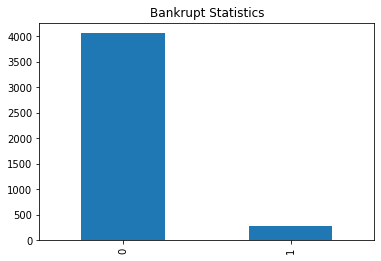

In [16]:
# EXPLORATORY DATA ANALYSIS

# Visualization
Bankrupt_stat = y_train.value_counts()
print(Bankrupt_stat)

Bankrupt_stat.plot(kind = 'bar', title = 'Bankrupt Statistics')

Remove columns due to missing data: Int64Index([36], dtype='int64')
(4336, 63)
(482, 63)


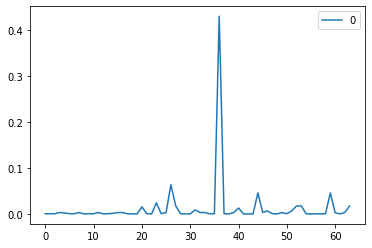

In [17]:
# PREPARE THE DATA

# Cleaning
# Dealing with missing data in columns
NaN_col = np.zeros((1, len(data_num.columns)-2))

for i in range((len(data_num.columns) - 2)):
    NaN_col[0][i] = ((data_num.iloc[:,i]).isnull().sum())/(len(data_num))
    
NaN_col_df = pd.DataFrame(np.transpose(NaN_col))
NaN_col_df.plot()

# Remove columns with too much missing data, set threshold = 0.1
col_threshold = 0.1
remove_col = NaN_col_df[NaN_col_df.iloc[:, 0] >= col_threshold]
print('Remove columns due to missing data: {}'.format(remove_col.index))

X_train = X_train.drop(X_train.columns[remove_col.index], axis = 1)
X_test = X_test.drop(X_test.columns[remove_col.index], axis = 1)

print(X_train.shape)
print(X_test.shape)

In [18]:
# Transformations and Scaling

from sklearn.impute import SimpleImputer

# Transform missing data into mean of other values
NaN_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
features = X_train.columns
X_train[features] = NaN_mean.fit_transform(X_train[features])
X_test[features] = NaN_mean.transform(X_test[features])

# Scaling

from sklearn.preprocessing import StandardScaler

## Data Scaler
#  Create a StandardScaler object
#    scaler: sklearn standard scaler
scaler = None

scaler = StandardScaler()

In [19]:
# TRAIN A MODEL

# Select a Model

Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Logistic Regression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

Model LR: Logistic Regression in sample score=0.94

Model LR: Logistic Regression avg cross validation score=0.93

Model LR: Logistic Regression out-of-sample score=0.93



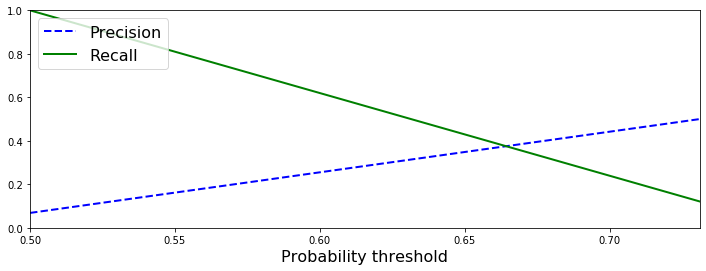

In [20]:
# 1. Logistic Regression Classifier

import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

clf_LR = None
name_LR = None

clf_LR = LogisticRegression(solver = 'liblinear')
name_LR = 'Logistic Regression'
model_pipeline_LR = Pipeline(steps = [('Scaler', scaler), (name_LR, clf_LR)])


# Train the model using accuracy score

from sklearn.metrics import accuracy_score
# Set variable
# score_in_sample: a scalar number, score for your in-sample examples
score_in_sample_LR = None

model_pipeline_LR.fit(X_train, y_train)
score_in_sample_LR = accuracy_score(y_train, model_pipeline_LR.predict(X_train))

print("Model LR: {m:s} in sample score={s:3.2f}\n".format(m=name_LR, s=score_in_sample_LR))


# Train the model using cross validation

# Set variable 
#  scores: an array of scores (length 5), one for each fold that is out-of-sample during cross-validation
#  k: number of folds
cross_val_scores_LR = None
k = 5

t0 = time.time()

cross_val_scores_LR = cross_val_score(model_pipeline_LR, X_train, y_train, cv = k)

print("Model LR: {m:s} avg cross validation score={s:3.2f}\n".format(m=name_LR, s=cross_val_scores_LR.mean()) )


# Compute the out-of-sample score

# Set variable to store the model accuracy on the test set
score_out_of_sample_LR = None

score_out_of_sample_LR = accuracy_score(y_test, model_pipeline_LR.predict(X_test))

print("Model LR: {m:s} out-of-sample score={s:3.2f}\n".format(m = name_LR, s = score_out_of_sample_LR))


# ERROR ANALYSIS

# Precison/Recall Tradeoff
from sklearn.metrics import precision_recall_curve

y_test_predict_LR = model_pipeline_LR.predict(X_test)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_test_predict_LR)

# Convert thresholds (log odds) to probability
probs = np.exp(thresholds)/(1+np.exp(thresholds))

def plot_precision_recall_vs_threshold (precisions, recalls, thresholds, probs = None):
    fig, ax = plt.subplots(1, 1, figsize = (12, 4))
    
    if probs is None:
        horiz = thresholds
        label = "Threshold"
    else:
        horiz = probs
        label = "Probability threshold"
    _ = ax.plot(horiz, precisions[:-1], "b--", label="Precision", linewidth=2)
    _ = ax.plot(horiz, recalls[:-1], "g-", label="Recall", linewidth=2)
    _ = ax.set_xlabel(label, fontsize=16)
    _ = ax.legend(loc="upper left", fontsize=16)
    _ = ax.set_ylim([0, 1])
    
    _ = ax.set_xlim([ horiz.min(), horiz.max()])
    
    return fig, ax

fig, ax = plot_precision_recall_vs_threshold(precisions, recalls, thresholds, probs=probs)

In [21]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

y_test_predict_LR = model_pipeline.predict(X_test)
confusion_mat_LR = confusion_matrix(y_test, y_test_predict_LR)

sn.heatmap(confusion_mat_LR, square=True, annot=True, fmt='d',cbar=False, xticklabels=np.unique(y),
           yticklabels=np.unique(y))

plt.show()

[[TN_LR, FP_LR], [FN_LR, TP_LR]] = confusion_matrix(y_test, y_test_predict_LR)
Accuracy_LR = (TP_LR + TN_LR)/(TP_LR + FP_LR + TN_LR + FN_LR)
Recall_LR = TP_LR/(TP_LR + FN_LR)
Precision_LR = TP_LR/(TP_LR + FP_LR)

print("Model LR: {m:s} Accuracy={s:3.2f}\n".format(m=name_LR, s=Accuracy_LR))
print("Model LR: {m:s} Recall={s:3.2f}\n".format(m=name_LR, s=Recall_LR))
print("Model LR: {m:s} Precision={s:3.2f}\n".format(m=name_LR, s=Precision_LR))

NameError: name 'model_pipeline' is not defined

Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Support Vector Classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

Model SVC: Support Vector Classifier in sample score=0.94

Model SVC: Support Vector Classifier avg cross validation score=0.94

Model SVC: Support Vector Classifier out-of-sample score=0.93



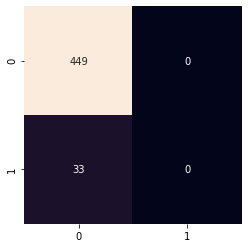

Model SVC: Support Vector Classifier Accuracy=0.93

Model SVC: Support Vector Classifier Recall=0.00

Model SVC: Support Vector Classifier Precision=nan



/Users/wuqian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in long_scalars


In [22]:
# 2. Support Vector Classifier

from sklearn.svm import SVC

clf_SVC = SVC(gamma='auto')
name_SVC = 'Support Vector Classifier'
model_pipeline_SVC = Pipeline(steps = [('Scaler', scaler), (name_SVC, clf_SVC)])


# Train the model using accuracy score

model_pipeline_SVC.fit(X_train, y_train)
score_in_sample_SVC = accuracy_score(y_train, model_pipeline_SVC.predict(X_train))

print("Model SVC: {m:s} in sample score={s:3.2f}\n".format(m=name_SVC, s=score_in_sample_SVC))


# Train the model using cross validation
cross_val_scores_SVC = None
k = 5

t0 = time.time()

cross_val_scores_SVC = cross_val_score(model_pipeline_SVC, X_train, y_train, cv = k)

print("Model SVC: {m:s} avg cross validation score={s:3.2f}\n".format(m=name_SVC, s=cross_val_scores_SVC.mean()) )


# Compute the out-of-sample score

score_out_of_sample_SVC = None

score_out_of_sample_SVC = accuracy_score(y_test, model_pipeline_SVC.predict(X_test))

print("Model SVC: {m:s} out-of-sample score={s:3.2f}\n".format(m=name_SVC, s=score_out_of_sample_SVC))


# ERROR ANALYSIS
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

y_test_predict_SVC = model_pipeline_SVC.predict(X_test)
confusion_mat_SVC = confusion_matrix(y_test, y_test_predict_SVC)

sn.heatmap(confusion_mat_SVC, square=True, annot=True, fmt='d',cbar=False, xticklabels=np.unique(y),
           yticklabels=np.unique(y))

plt.show()

[[TN_SVC, FP_SVC], [FN_SVC, TP_SVC]] = confusion_matrix(y_test, y_test_predict_SVC)
Accuracy_SVC = (TP_SVC + TN_SVC)/(TP_SVC + FP_SVC + TN_SVC + FN_SVC)
Recall_SVC = TP_SVC/(TP_SVC + FN_SVC)
Precision_SVC = TP_SVC/(TP_SVC + FP_SVC)

print("Model SVC: {m:s} Accuracy={s:3.2f}\n".format(m=name_SVC, s=Accuracy_SVC))
print("Model SVC: {m:s} Recall={s:3.2f}\n".format(m=name_SVC, s=Recall_SVC))
print("Model SVC: {m:s} Precision={s:3.2f}\n".format(m=name_SVC, s=Precision_SVC))

Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Random Forest Classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=5, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False))],
         verbose=False)

Model RF: Random Forest Classifier in sample score=0.96

Model RF: Random Forest Classifier avg cross validation score=0.95

Model RF: Random Forest Classifier out-of-sample score=0.94



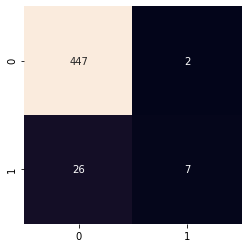

Model RF: Random Forest Classifier Accuracy=0.94

Model RF: Random Forest Classifier Recall=0.21

Model RF: Random Forest Classifier Precision=0.78



In [23]:
# 3. Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(max_depth = 5, random_state = 0)
name_RF = 'Random Forest Classifier'
model_pipeline_RF = Pipeline(steps = [('Scaler', scaler), (name_RF, clf_RF)])


# Train the model using accuracy score

model_pipeline_RF.fit(X_train, y_train)
score_in_sample_RF = accuracy_score(y_train, model_pipeline_RF.predict(X_train))

print("Model RF: {m:s} in sample score={s:3.2f}\n".format(m=name_RF, s=score_in_sample_RF))


# Train the model using cross validation
cross_val_scores_RF = None
k = 5

t0 = time.time()

cross_val_scores_RF = cross_val_score(model_pipeline_RF, X_train, y_train, cv = k)

print("Model RF: {m:s} avg cross validation score={s:3.2f}\n".format(m=name_RF, s=cross_val_scores_RF.mean()) )


# Compute the out-of-sample score

score_out_of_sample_RF = None

score_out_of_sample_RF = accuracy_score(y_test, model_pipeline_RF.predict(X_test))

print("Model RF: {m:s} out-of-sample score={s:3.2f}\n".format(m=name_RF, s=score_out_of_sample_RF))


# ERROR ANALYSIS
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

y_test_predict_RF = model_pipeline_RF.predict(X_test)
confusion_mat_RF = confusion_matrix(y_test, y_test_predict_RF)

sn.heatmap(confusion_mat_RF, square=True, annot=True, fmt='d',cbar=False, xticklabels=np.unique(y),
           yticklabels=np.unique(y))

plt.show()

[[TN_RF, FP_RF], [FN_RF, TP_RF]] = confusion_matrix(y_test, y_test_predict_RF)
Accuracy_RF = (TP_RF + TN_RF)/(TP_RF + FP_RF + TN_RF + FN_RF)
Recall_RF = TP_RF/(TP_RF + FN_RF)
Precision_RF = TP_RF/(TP_RF + FP_RF)

print("Model RF: {m:s} Accuracy={s:3.2f}\n".format(m=name_RF, s=Accuracy_RF))
print("Model RF: {m:s} Recall={s:3.2f}\n".format(m=name_RF, s=Recall_RF))
print("Model RF: {m:s} Precision={s:3.2f}\n".format(m=name_RF, s=Precision_RF))

Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Decision Tree',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False)

Model DT: Decision Tree in sample score=1.00

Model DT: Decision Tree avg cross validation score=0.94

Model DT: Decision Tree out-of-sample score=0.93



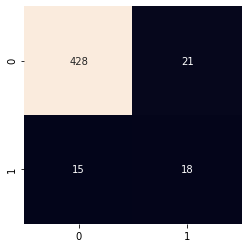

Model DT: Decision Tree Accuracy=0.93

Model DT: Decision Tree Recall=0.55

Model DT: Decision Tree Precision=0.46



In [24]:
# 4. Decision Trees Classifier

from sklearn import tree

clf_DT = tree.DecisionTreeClassifier()
name_DT = 'Decision Tree'
model_pipeline_DT = Pipeline(steps = [('Scaler', scaler), (name_DT, clf_DT)])


# Train the model using accuracy score

model_pipeline_DT.fit(X_train, y_train)
score_in_sample_DT = accuracy_score(y_train, model_pipeline_DT.predict(X_train))

print("Model DT: {m:s} in sample score={s:3.2f}\n".format(m=name_DT, s=score_in_sample_DT))


# Train the model using cross validation
cross_val_scores_DT = None
k = 5

t0 = time.time()

cross_val_scores_DT = cross_val_score(model_pipeline_DT, X_train, y_train, cv = k)

print("Model DT: {m:s} avg cross validation score={s:3.2f}\n".format(m=name_DT, s=cross_val_scores_DT.mean()) )


# Compute the out-of-sample score

score_out_of_sample_DT = None

score_out_of_sample_DT = accuracy_score(y_test, model_pipeline_DT.predict(X_test))

print("Model DT: {m:s} out-of-sample score={s:3.2f}\n".format(m=name_DT, s=score_out_of_sample_DT))


# ERROR ANALYSIS
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

y_test_predict_DT = model_pipeline_DT.predict(X_test)
confusion_mat_DT = confusion_matrix(y_test, y_test_predict_DT)

sn.heatmap(confusion_mat_DT, square=True, annot=True, fmt='d',cbar=False, xticklabels=np.unique(y),
           yticklabels=np.unique(y))

plt.show()

[[TN_DT, FP_DT], [FN_DT, TP_DT]] = confusion_matrix(y_test, y_test_predict_DT)
Accuracy_DT = (TP_DT + TN_DT)/(TP_DT + FP_DT + TN_DT + FN_DT)
Recall_DT = TP_DT/(TP_DT + FN_DT)
Precision_DT = TP_DT/(TP_DT + FP_DT)

print("Model DT: {m:s} Accuracy={s:3.2f}\n".format(m=name_DT, s=Accuracy_DT))
print("Model DT: {m:s} Recall={s:3.2f}\n".format(m=name_DT, s=Recall_DT))
print("Model DT: {m:s} Precision={s:3.2f}\n".format(m=name_DT, s=Precision_DT))

Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Naive Bayes', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

Model NB: Naive Bayes in sample score=0.16

Model NB: Naive Bayes avg cross validation score=0.16

Model NB: Naive Bayes out-of-sample score=0.18



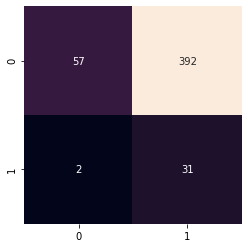

Model NB: Naive Bayes Accuracy=0.18

Model NB: Naive Bayes Recall=0.94

Model NB: Naive Bayes Precision=0.07



In [25]:
# 5. Naive Bayes

from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
name_NB = 'Naive Bayes'
model_pipeline_NB = Pipeline(steps = [('Scaler', scaler), (name_NB, clf_NB)])

# Train the model using accuracy score

model_pipeline_NB.fit(X_train, y_train)
score_in_sample_NB = accuracy_score(y_train, model_pipeline_NB.predict(X_train))

print("Model NB: {m:s} in sample score={s:3.2f}\n".format(m=name_NB, s=score_in_sample_NB))


# Train the model using cross validation
cross_val_scores_NB = None
k = 5

t0 = time.time()

cross_val_scores_NB = cross_val_score(model_pipeline_NB, X_train, y_train, cv = k)

print("Model NB: {m:s} avg cross validation score={s:3.2f}\n".format(m=name_NB, s=cross_val_scores_NB.mean()) )


# Compute the out-of-sample score

score_out_of_sample_NB = None

score_out_of_sample_NB = accuracy_score(y_test, model_pipeline_NB.predict(X_test))

print("Model NB: {m:s} out-of-sample score={s:3.2f}\n".format(m=name_NB, s=score_out_of_sample_NB))


# ERROR ANALYSIS
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

y_test_predict_NB = model_pipeline_NB.predict(X_test)
confusion_mat_NB = confusion_matrix(y_test, y_test_predict_NB)

sn.heatmap(confusion_mat_NB, square=True, annot=True, fmt='d',cbar=False, xticklabels=np.unique(y),
           yticklabels=np.unique(y))

plt.show()

[[TN_NB, FP_NB], [FN_NB, TP_NB]] = confusion_matrix(y_test, y_test_predict_NB)
Accuracy_NB = (TP_NB + TN_NB)/(TP_NB + FP_NB + TN_NB + FN_NB)
Recall_NB = TP_NB/(TP_NB + FN_NB)
Precision_NB = TP_NB/(TP_NB + FP_NB)

print("Model NB: {m:s} Accuracy={s:3.2f}\n".format(m=name_NB, s=Accuracy_NB))
print("Model NB: {m:s} Recall={s:3.2f}\n".format(m=name_NB, s=Recall_NB))
print("Model NB: {m:s} Precision={s:3.2f}\n".format(m=name_NB, s=Precision_NB))

/Users/wuqian/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Gradient Descent',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=5, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

Model SGD: Gradient Descent in sample score=0.93

Model SGD: Gradient Descent avg cross validation score=0.92

Model SGD: Gradient Descent out-of-sample score=0.91



/Users/wuqian/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/wuqian/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/wuqian/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/wuqian/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  Converge

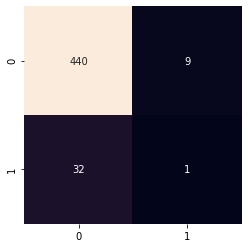

Model SGD: Gradient Descent Accuracy=0.91

Model SGD: Gradient Descent Recall=0.03

Model SGD: Gradient Descent Precision=0.10



In [26]:
# 6. Gradient Descent

from sklearn.linear_model import SGDClassifier

clf_SGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
name_SGD = 'Gradient Descent'
model_pipeline_SGD = Pipeline(steps = [('Scaler', scaler), (name_SGD, clf_SGD)])

# Train the model using accuracy score

model_pipeline_SGD.fit(X_train, y_train)
score_in_sample_SGD = accuracy_score(y_train, model_pipeline_SGD.predict(X_train))

print("Model SGD: {m:s} in sample score={s:3.2f}\n".format(m=name_SGD, s=score_in_sample_SGD))


# Train the model using cross validation
cross_val_scores_SGD = None
k = 5

t0 = time.time()

cross_val_scores_SGD = cross_val_score(model_pipeline_SGD, X_train, y_train, cv = k)

print("Model SGD: {m:s} avg cross validation score={s:3.2f}\n".format(m=name_SGD, s=cross_val_scores_SGD.mean()) )


# Compute the out-of-sample score

score_out_of_sample_SGD = None

score_out_of_sample_SGD = accuracy_score(y_test, model_pipeline_SGD.predict(X_test))

print("Model SGD: {m:s} out-of-sample score={s:3.2f}\n".format(m=name_SGD, s=score_out_of_sample_SGD))


# ERROR ANALYSIS
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

y_test_predict_SGD = model_pipeline_SGD.predict(X_test)
confusion_mat_SGD = confusion_matrix(y_test, y_test_predict_SGD)

sn.heatmap(confusion_mat_SGD, square=True, annot=True, fmt='d',cbar=False, xticklabels=np.unique(y),
           yticklabels=np.unique(y))

plt.show()

[[TN_SGD, FP_SGD], [FN_SGD, TP_SGD]] = confusion_matrix(y_test, y_test_predict_SGD)
Accuracy_SGD = (TP_SGD + TN_SGD)/(TP_SGD + FP_SGD + TN_SGD + FN_SGD)
Recall_SGD = TP_SGD/(TP_SGD + FN_SGD)
Precision_SGD = TP_SGD/(TP_SGD + FP_SGD)

print("Model SGD: {m:s} Accuracy={s:3.2f}\n".format(m=name_SGD, s=Accuracy_SGD))
print("Model SGD: {m:s} Recall={s:3.2f}\n".format(m=name_SGD, s=Recall_SGD))
print("Model SGD: {m:s} Precision={s:3.2f}\n".format(m=name_SGD, s=Precision_SGD))

Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Gradient Boosting',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=1.0, loss='deviance',
                                            max_depth=1, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
    

Model GB: Gradient Boosting in sample score=0.92

Model GB: Gradient Boosting avg cross validation score=0.95

Model GB: Gradient Boosting out-of-sample score=0.88



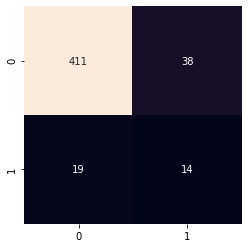

Model GB: Gradient Boosting Accuracy=0.88

Model GB: Gradient Boosting Recall=0.42

Model GB: Gradient Boosting Precision=0.27



In [27]:
#7. Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

clf_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
name_GB = 'Gradient Boosting'
model_pipeline_GB = Pipeline(steps = [('Scaler', scaler), (name_GB, clf_GB)])

# Train the model using accuracy score

model_pipeline_GB.fit(X_train, y_train)
score_in_sample_GB = accuracy_score(y_train, model_pipeline_GB.predict(X_train))

print("Model GB: {m:s} in sample score={s:3.2f}\n".format(m=name_GB, s=score_in_sample_GB))


# Train the model using cross validation
cross_val_scores_GB = None
k = 5

t0 = time.time()

cross_val_scores_GB = cross_val_score(model_pipeline_GB, X_train, y_train, cv = k)

print("Model GB: {m:s} avg cross validation score={s:3.2f}\n".format(m=name_GB, s=cross_val_scores_GB.mean()) )


# Compute the out-of-sample score

score_out_of_sample_GB = None

score_out_of_sample_GB = accuracy_score(y_test, model_pipeline_GB.predict(X_test))

print("Model GB: {m:s} out-of-sample score={s:3.2f}\n".format(m=name_GB, s=score_out_of_sample_GB))


# ERROR ANALYSIS
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

y_test_predict_GB = model_pipeline_GB.predict(X_test)
confusion_mat_GB = confusion_matrix(y_test, y_test_predict_GB)

sn.heatmap(confusion_mat_GB, square=True, annot=True, fmt='d',cbar=False, xticklabels=np.unique(y),
           yticklabels=np.unique(y))

plt.show()

[[TN_GB, FP_GB], [FN_GB, TP_GB]] = confusion_matrix(y_test, y_test_predict_GB)
Accuracy_GB = (TP_GB + TN_GB)/(TP_GB + FP_GB + TN_GB + FN_GB)
Recall_GB = TP_GB/(TP_GB + FN_GB)
Precision_GB = TP_GB/(TP_GB + FP_GB)

print("Model GB: {m:s} Accuracy={s:3.2f}\n".format(m=name_GB, s=Accuracy_GB))
print("Model GB: {m:s} Recall={s:3.2f}\n".format(m=name_GB, s=Recall_GB))
print("Model GB: {m:s} Precision={s:3.2f}\n".format(m=name_GB, s=Precision_GB))

/Users/wuqian/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Ensemble',
                 VotingClassifier(estimators=[('Logistic Regression',
                                               LogisticRegression(C=1.0,
                                                                  class_weight=None,
                                                                  dual=False,
                                                                  fit_intercept=True,
                                                                  intercept_scaling=1,
                                                                  l1_ratio=None,
                                                                  max_iter=100,
                                                                  multi_class='auto',
                                                                  n_jobs=None,
                                         

Model Ensemble: Ensemble in sample score=0.94



/Users/wuqian/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/wuqian/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/wuqian/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/wuqian/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  Converge

Model Ensemble: Ensemble avg cross validation score=0.94

Model Ensemble: Ensemble out-of-sample score=0.94



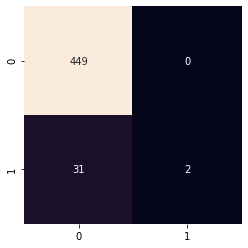

Model Ensemble: Ensemble Accuracy=0.94

Model Ensemble: Ensemble Recall=0.06

Model Ensemble: Ensemble Precision=1.00



In [28]:
# 8. Ensembles
# Ensemble the previous models together, except Naive Bayes

from sklearn.ensemble import VotingClassifier

clf_Ensemble = VotingClassifier(estimators=[('Logistic Regression', clf_LR), 
                                            ('Support Vector Classifier', clf_SVC), 
                                            ('Random Forest Classifier', clf_RF),
                                            ('Decision Trees Classifier', clf_DT),
                                            ('Gradient Descent', clf_SGD), 
                                            ('Gradient Boosting', clf_GB)],
                                voting='hard')
name_Ensemble = 'Ensemble'
model_pipeline_Ensemble = Pipeline(steps = [('Scaler', scaler), (name_Ensemble, clf_Ensemble)])


# Train the model using accuracy score

model_pipeline_Ensemble.fit(X_train, y_train)
score_in_sample_Ensemble = accuracy_score(y_train, model_pipeline_Ensemble.predict(X_train))

print("Model Ensemble: {m:s} in sample score={s:3.2f}\n".format(m=name_Ensemble, s=score_in_sample_Ensemble))


# Train the model using cross validation
cross_val_scores_Ensemble = None
k = 5

t0 = time.time()

cross_val_scores_Ensemble = cross_val_score(model_pipeline_Ensemble, X_train, y_train, cv = k)

print("Model Ensemble: {m:s} avg cross validation score={s:3.2f}\n".format(m=name_Ensemble, 
                                                                           s=cross_val_scores_Ensemble.mean()) )


# Compute the out-of-sample score

score_out_of_sample_Ensembel = None

score_out_of_sample_Ensemble = accuracy_score(y_test, model_pipeline_Ensemble.predict(X_test))

print("Model Ensemble: {m:s} out-of-sample score={s:3.2f}\n".format(m=name_Ensemble, 
                                                                    s=score_out_of_sample_Ensemble))


# ERROR ANALYSIS
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

y_test_predict_Ensemble = model_pipeline_Ensemble.predict(X_test)
confusion_mat_Ensemble = confusion_matrix(y_test, y_test_predict_Ensemble)

sn.heatmap(confusion_mat_Ensemble, square=True, annot=True, fmt='d',cbar=False, xticklabels=np.unique(y),
           yticklabels=np.unique(y))

plt.show()

[[TN_Ensemble, FP_Ensemble], [FN_Ensemble, TP_Ensemble]] = confusion_matrix(y_test, y_test_predict_Ensemble)
Accuracy_Ensemble = (TP_Ensemble + TN_Ensemble)/(TP_Ensemble + FP_Ensemble + TN_Ensemble + FN_Ensemble)
Recall_Ensemble = TP_Ensemble/(TP_Ensemble + FN_Ensemble)
Precision_Ensemble = TP_Ensemble/(TP_Ensemble + FP_Ensemble)

print("Model Ensemble: {m:s} Accuracy={s:3.2f}\n".format(m=name_Ensemble, s=Accuracy_Ensemble))
print("Model Ensemble: {m:s} Recall={s:3.2f}\n".format(m=name_Ensemble, s=Recall_Ensemble))
print("Model Ensemble: {m:s} Precision={s:3.2f}\n".format(m=name_Ensemble, s=Precision_Ensemble))

## Submission guidelines

Although your notebook may contain many models (e.g., due to your iterative development)
we will only evaluate a single model.
So choose one (explain why !) and do the following.

- You will implement the body of a subroutine `MyModel`
    - That takes as argument a Pandas DataFrame 
        - Each row is an example on which to predict
        - The features of the example are elements of the row
    - Performs predictions on each example
    - Returns an array or predictions with a one-to-one correspondence with the examples in the test set
    

We will evaluate your model against the holdout data
- By reading the holdout examples `X_hold` (as above)
- Calling `y_hold_pred = MyModel(X_hold)` to get the predictions
- Comparing the predicted values `y_hold_pred` against the true labels `y_hold` which are known only to the instructors

See the following cell as an illustration

**Remember**

The holdout data is in the same format as the one we used for training
- Except that it has no attribute for the target
- So you will need to perform all the transformations on the holdout data
    - As you did on the training data
    - Including turning the string representation of numbers into actual numeric data types

All of this work *must* be performed within the body of the `MyModel` routine you will write

We will grade you by comparing the predictions array you create to the answers known to us.

In [32]:

import pandas as pd
import os

def MyModel(X):
    # It should create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    
    X_num = X.apply(pd.to_numeric, errors = 'coerce')
    
    NaN_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    
    clf_LR = LogisticRegression(solver = 'liblinear')
    clf_SVC = SVC(gamma='auto')
    clf_RF = RandomForestClassifier(max_depth = 5, random_state = 0)
    clf_DT = tree.DecisionTreeClassifier()
    
    Final_Model = VotingClassifier(estimators=[('Logistic Regression', clf_LR), 
                                               ('Support Vector Classifier', clf_SVC), 
                                               ('Random Forest Classifier', clf_RF),
                                               ('Decision Trees Classifier', clf_DT),],
                                voting='hard')
    name_final = 'Final Model'
    model_pipeline_Final = Pipeline(steps = [('imputer', NaN_mean), (name_final, Final_Model)])
    model_pipeline_Final.fit(X_train, y_train)
    
    predictions = model_pipeline_Ensemble.predict(X_num)
    
    return predictions

# Check your work: predict and evaluate metrics on *your* test examples

Although only the instructors have the correct labels for the holdout dataset, you may want
to create your own test dataset on which to evaluate your out of sample metrics.

If you choose to do so, you can evaluate your models using the same metrics that the instructors will use.

- Test whether your implementation of `MyModel` works
- See the metrics  your model produces

The following cell
- Assumes that you have created `X_test, y_test` as your proxy for an out of sample dataset
    - It serves the same function as `X_hold`, the holdout dataset, but you have the associated target (only the instructors have `y_hold`)

In [33]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Give the model a name (will appear in the print statement)
name = "Fina Model"

y_test_pred = MyModel(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred, pos_label=1, average="binary")
precision_test = precision_score(y_test,   y_test_pred, pos_label=1, average="binary")

print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )

/Users/wuqian/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


	Fina Model Accuracy: 93.6%, Recall 6.1%, Precision 100.0%
